In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import scipy.integrate as spi
import h5py
import os
import seaborn as sns

from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
file_path = '/fred/oz009/cpower/TheThreeHundred/NewMDCLUSTER_001/GIZMO_7k-NewMDCLUSTER_001.snap_128.z0.000.AHF_halos'
with open(file_path, 'r') as file:
    print(file.readline())  

# DM_density = np.loadtxt('./data/density_profiles_GIZMO_7k_DM.txt')
DM_density48 = np.loadtxt('/fred/oz009/kwalker/data/TheThreeHundred/ming/density_profiles_DM_100r48a_GIZMO_7k.txt')
Gas_density48 = np.loadtxt('/fred/oz009/kwalker/data/TheThreeHundred/ming/density_profiles_gas_100r48a_GIZMO_7k.txt')
Stars_density48 = np.loadtxt('/fred/oz009/kwalker/data/TheThreeHundred/ming/density_profiles_stars_100r48a_GIZMO_7k.txt')
Gas_density = np.loadtxt('./data/density_profiles_GIZMO_7k_gas.txt')
Stars_density = np.loadtxt('./data/density_profiles_GIZMO_7k_stars.txt')
Gas_sph_density = np.loadtxt('./data/density_sph_profiles_GIZMO_7k_gas.txt')
# Gas_entropy = np.loadtxt('./data/entropy_profiles_GIZMO_7k_gas.txt')
Gas_entropy48 = np.loadtxt('/fred/oz009/kwalker/data/TheThreeHundred/ming/entropy_profiles_100r48a_GIZMO_7k.txt')
Gas_internalenergy = np.loadtxt('./data/internal_energy_profiles_GIZMO_7k_gas.txt')
M200_R200 = np.loadtxt('./data/cluster_M200_R200_GIZMO_7k_snap128.txt')
Properties = np.loadtxt('./data/cluster_properties_GIZMO_7k_snap128.txt')
History = np.loadtxt('./data/M200_histories_GIZMO.txt')

print(DM_density48.shape,Gas_density.shape,Stars_density.shape,Gas_sph_density.shape,Gas_entropy48.shape,Gas_internalenergy.shape
     ,M200_R200.shape, Properties.shape)

print(DM_density48)
DM_density_reshaped = DM_density48.reshape(324, 48, 100)
DM_density = np.median(DM_density_reshaped, axis=1)

Gas_density_reshaped = Gas_density48.reshape(324, 48, 100)
Gas_density = np.median(Gas_density_reshaped, axis=1)

Stars_density_reshaped = Stars_density48.reshape(324, 48, 100)
Stars_density = np.median(Stars_density_reshaped, axis=1)

Gas_entropy_reshaped = Gas_entropy48.reshape(324, 48, 100)
Gas_entropy = np.median(Gas_entropy_reshaped, axis=1)

#ID(1)	hostHalo(2)	numSubStruct(3)	Mhalo(4)	npart(5)	Xc(6)	Yc(7)	Zc(8)	VXc(9)	VYc(10)	VZc(11)	Rhalo(12)	Rmax(13)	r2(14)	mbp_offset(15)	com_offset(16)	Vmax(17)	v_esc(18)	sigV(19)	lambda(20)	lambdaE(21)	Lx(22)	Ly(23)	Lz(24)	b(25)	c(26)	Eax(27)	Eay(28)	Eaz(29)	Ebx(30)	Eby(31)	Ebz(32)	Ecx(33)	Ecy(34)	Ecz(35)	ovdens(36)	nbins(37)	fMhires(38)	Ekin(39)	Epot(40)	SurfP(41)	Phi0(42)	cNFW(43)	n_gas(44)	M_gas(45)	lambda_gas(46)	lambdaE_gas(47)	Lx_gas(48)	Ly_gas(49)	Lz_gas(50)	b_gas(51)	c_gas(52)	Eax_gas(53)	Eay_gas(54)	Eaz_gas(55)	Ebx_gas(56)	Eby_gas(57)	Ebz_gas(58)	Ecx_gas(59)	Ecy_gas(60)	Ecz_gas(61)	Ekin_gas(62)	Epot_gas(63)	n_star(64)	M_star(65)	lambda_star(66)	lambdaE_star(67)	Lx_star(68)	Ly_star(69)	Lz_star(70)	b_star(71)	c_star(72)	Eax_star(73)	Eay_star(74)	Eaz_star(75)	Ebx_star(76)	Eby_star(77)	Ebz_star(78)	Ecx_star(79)	Ecy_star(80)	Ecz_star(81)	Ekin_star(82)	Epot_star(83)	mean_z_gas(84)	mean_z_star(85)	n_star_excised(86)	M_star_excised(87)	mean_z_star_excised(88)	

(15552, 100) (324, 100) 

1.972103029718828
1.7152346431574592
2.1146214371947494


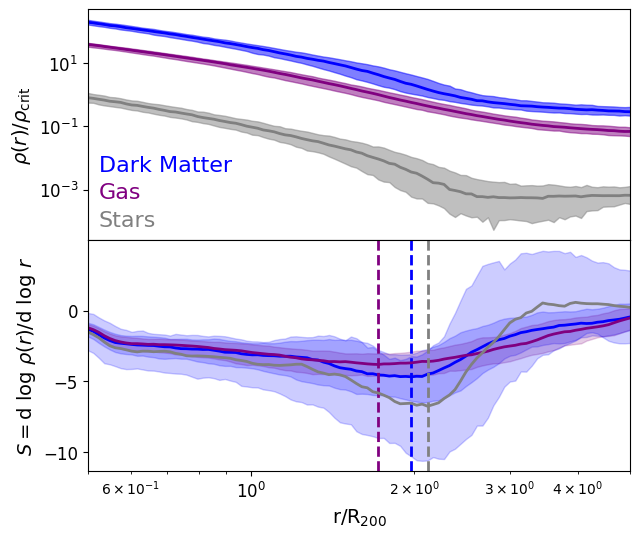

In [3]:
# DM density profile
Rsp=[]
rhonorm=2.7753662724817174e-08#*0.6777**2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
start = 0.5
end = 5
log_bins = np.logspace(np.log10(start), np.log10(end), 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(hspace=0.0)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for i in range(DM_density.shape[0]):
# for i in range(10):
    # ax1.plot(log_bins, DM_density[i]/rhonorm, color='blue',linewidth=0.5, alpha=0.2)
    smoothed_density = gaussian_filter1d(DM_density[i], sigma=2)
    # smoothed_density = savgol_filter(DM_density[i], window_length=15, polyorder=3, deriv=0, delta=0.1)
    log_D = np.log(smoothed_density)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    # ax2.plot(log_bins, smoothed_d_log_D, color='blue', linestyle='-', linewidth=0.5, alpha=0.2) # colors[i % len(colors)]
    
    restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    
    r_splash_index = np.argmin(smoothed_d_log_D_restricted)
    r_splash = rr[r_splash_index]
    
    interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    log_bins_dense = np.linspace(r_splash-0.2, r_splash+0.2, 500)
    smoothed_d_log_D_dense = interp_func(log_bins_dense)
    max_index = np.argmin(smoothed_d_log_D_dense)
    r_splash = log_bins_dense[max_index]

    Rsp.append(r_splash)
    
median_DM_density = np.median(DM_density, axis=0)
percentile16_DM_density = np.percentile(DM_density, 10, axis=0)
percentile84_DM_density = np.percentile(DM_density, 90, axis=0)

ax1.plot(log_bins, median_DM_density / rhonorm, color='b', linewidth=2.0, alpha=1)
ax1.fill_between(log_bins, percentile16_DM_density / rhonorm, percentile84_DM_density / rhonorm, color='b', alpha=0.5)

d_log_D_all = []
for density in DM_density:
    # smoothed_density = savgol_filter(density, window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_density = gaussian_filter1d(density, sigma=2)
    log_D = np.log(smoothed_density)
    d_log_D = np.gradient(log_D, log_r)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    d_log_D_all.append(smoothed_d_log_D)

d_log_D_all = np.array(d_log_D_all)
median_d_log_D = np.median(d_log_D_all, axis=0)
percentile16_d_log_D = np.percentile(d_log_D_all, 10, axis=0)
percentile84_d_log_D = np.percentile(d_log_D_all, 90, axis=0)

ax2.plot(log_bins, median_d_log_D, color='b', linestyle='-', linewidth=2.0)
ax2.fill_between(log_bins, percentile16_d_log_D, percentile84_d_log_D, color='b', alpha=0.2)

restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
rr = log_bins[restricted_indices]
smoothed_d_log_D_restricted = median_d_log_D[restricted_indices]
r_splash_index = np.argmin(smoothed_d_log_D_restricted)
r_splash1 = rr[r_splash_index]
ax2.axvline(x=r_splash1, color='blue', linestyle='--', linewidth=2.0)
print(r_splash1)

# gas density profile
Rsp_gas=[]
for i in range(Gas_density.shape[0]):
# for i in range(10):
    # ax1.plot(log_bins, DM_density[i]/rhonorm, color='blue',linewidth=0.5, alpha=0.2)
    smoothed_density = gaussian_filter1d(Gas_density[i], sigma=2)
    # smoothed_density = savgol_filter(DM_density[i], window_length=15, polyorder=3, deriv=0, delta=0.1)
    log_D = np.log(smoothed_density)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    # ax2.plot(log_bins, smoothed_d_log_D, color='blue', linestyle='-', linewidth=0.5, alpha=0.2) # colors[i % len(colors)]
    
    restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    
    r_splash_index = np.argmin(smoothed_d_log_D_restricted)
    r_splash = rr[r_splash_index]
    
    # interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    # log_bins_dense = np.linspace(r_splash-0.2, r_splash+0.2, 500)
    # smoothed_d_log_D_dense = interp_func(log_bins_dense)
    # max_index = np.argmin(smoothed_d_log_D_dense)
    # r_splash = log_bins_dense[max_index]

    Rsp_gas.append(r_splash)
    
median_DM_density = np.median(Gas_density, axis=0)
percentile16_DM_density = np.percentile(Gas_density, 10, axis=0)
percentile84_DM_density = np.percentile(Gas_density, 90, axis=0)

ax1.plot(log_bins, median_DM_density / rhonorm, color='purple', linewidth=2.0, alpha=1)
ax1.fill_between(log_bins, percentile16_DM_density / rhonorm, percentile84_DM_density / rhonorm, color='purple', alpha=0.5)

d_log_D_all = []
for density in Gas_density:
    # smoothed_density = savgol_filter(density, window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_density = gaussian_filter1d(density, sigma=2)
    log_D = np.log(smoothed_density)
    d_log_D = np.gradient(log_D, log_r)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    d_log_D_all.append(smoothed_d_log_D)

d_log_D_all = np.array(d_log_D_all)
median_d_log_D = np.median(d_log_D_all, axis=0)
percentile16_d_log_D = np.percentile(d_log_D_all, 10, axis=0)
percentile84_d_log_D = np.percentile(d_log_D_all, 90, axis=0)

ax2.plot(log_bins, median_d_log_D, color='purple', linestyle='-', linewidth=2.0)
ax2.fill_between(log_bins, percentile16_d_log_D, percentile84_d_log_D, color='purple', alpha=0.2)

restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
rr = log_bins[restricted_indices]
smoothed_d_log_D_restricted = median_d_log_D[restricted_indices]
r_splash_index = np.argmin(smoothed_d_log_D_restricted)
r_splash1 = rr[r_splash_index]
ax2.axvline(x=r_splash1, color='purple', linestyle='--', linewidth=2.0)
print(r_splash1)

# stars density profile 
Rsp_star=[]

for i in range(Stars_density.shape[0]):
# for i in range(10):
    # ax1.plot(log_bins, DM_density[i]/rhonorm, color='blue',linewidth=0.5, alpha=0.2)
    smoothed_density = gaussian_filter1d(Stars_density[i], sigma=2)
    # smoothed_density = savgol_filter(DM_density[i], window_length=15, polyorder=3, deriv=0, delta=0.1)
    log_D = np.log(smoothed_density)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    # ax2.plot(log_bins, smoothed_d_log_D, color='blue', linestyle='-', linewidth=0.5, alpha=0.2) # colors[i % len(colors)]
    
    restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    
    r_splash_index = np.argmin(smoothed_d_log_D_restricted)
    r_splash = rr[r_splash_index]
    
    # interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    # log_bins_dense = np.linspace(r_splash-0.2, r_splash+0.2, 500)
    # smoothed_d_log_D_dense = interp_func(log_bins_dense)
    # max_index = np.argmin(smoothed_d_log_D_dense)
    # r_splash = log_bins_dense[max_index]

    Rsp_star.append(r_splash)
    
median_DM_density = np.median(Stars_density, axis=0)
percentile16_DM_density = np.percentile(Stars_density, 10, axis=0)
percentile84_DM_density = np.percentile(Stars_density, 90, axis=0)

ax1.plot(log_bins, median_DM_density / rhonorm, color='gray', linewidth=2.0, alpha=1)
ax1.fill_between(log_bins, percentile16_DM_density / rhonorm, percentile84_DM_density / rhonorm, color='gray', alpha=0.5)

d_log_D_all = []
for density in Stars_density:
    # smoothed_density = savgol_filter(density, window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_density = gaussian_filter1d(density, sigma=2)
    log_D = np.log(smoothed_density)
    d_log_D = np.gradient(log_D, log_r)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    d_log_D_all.append(smoothed_d_log_D)

d_log_D_all = np.array(d_log_D_all)
median_d_log_D = np.median(d_log_D_all, axis=0)
percentile16_d_log_D = np.percentile(d_log_D_all, 10, axis=0)
percentile84_d_log_D = np.percentile(d_log_D_all, 90, axis=0)

ax2.plot(log_bins, median_d_log_D, color='gray', linestyle='-', linewidth=2.0)
ax2.fill_between(log_bins, percentile16_d_log_D, percentile84_d_log_D, color='b', alpha=0.2)

restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
rr = log_bins[restricted_indices]
smoothed_d_log_D_restricted = median_d_log_D[restricted_indices]
r_splash_index = np.argmin(smoothed_d_log_D_restricted)
r_splash1 = rr[r_splash_index]
ax2.axvline(x=r_splash1, color='gray', linestyle='--', linewidth=2.0)
print(r_splash1)

label = ['Dark Matter','Gas','Stars']
colors = ['Blue', 'Purple', 'Gray']
for i in range(3):
    ax1.text(0.02, 0.3 - i * 0.12, label[i], size=16, color=colors[i], transform=ax1.transAxes)

ax1.set_ylabel(r'$\rho(r)/\rho_{\rm crit}$', fontsize=14) #{\rm Log}_{10} 
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.5,5)
ax1.get_xaxis().set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r'${\rm r/R}_{200}$', fontsize=14)
ax2.set_ylabel(r'$S = {\rm d~log}~\rho(r) / {\rm d~log}~r$', fontsize=14)
# ax2.set_ylabel(r'$S$')
ax2.set_xlim(0.5,5)
# ax2.set_ylim(-6.8,3)
plt.savefig("./figures/DM_splashback_radius_GIZMO_7k.png")

[2.90725583e+10 2.54095735e+10 2.42338734e+10 2.41377136e+10
 2.44231990e+10 2.43705992e+10 2.17157724e+10 2.54399047e+10
 2.15931493e+10 2.04324524e+10]
2.54706900740819
3.7823166377731448


(0.5, 5)

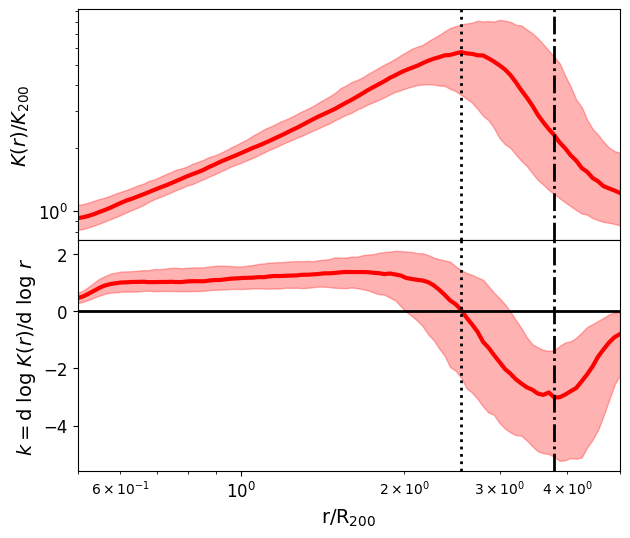

In [4]:
M200 = M200_R200[:,0]
R200 = M200_R200[:,1]
K200 = 0.5 / (200*rhonorm*0.156)**(2/3) * 4.3e-6 * M200 / R200
print(K200[:10])

# Gas entropy profile
Rsh=[]
Rsh2=[]
Gas_K=[]
fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(hspace=0.0)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for i in range(Gas_entropy.shape[0]):
# for i in range(10):
    # ax1.plot(log_bins, Gas_entropy[i]/K200[i], color='blue',linewidth=0.5, alpha=0.3)
    # smoothed_entropy = savgol_filter(Gas_entropy[i]/K200[i], window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_entropy = gaussian_filter1d(Gas_entropy[i], sigma=2)
    log_D = np.log(smoothed_entropy)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    # ax2.plot(log_bins, smoothed_d_log_D, color='blue', linestyle='-', linewidth=0.5, alpha=0.3) # colors[i % len(colors)]

    r_range_mask = (log_bins >= 0.55) & (log_bins <= 4.5)
    rgav_1_in_range = log_bins[r_range_mask]
    umed_av_in_range = smoothed_entropy[r_range_mask]
    
    if len(umed_av_in_range) > 0:
        max_entropy_index = np.argmax(umed_av_in_range)
        r_shock = rgav_1_in_range[max_entropy_index]

        interp_func = interp1d(log_bins, smoothed_entropy, kind='cubic')
        log_bins_dense = np.linspace(r_shock-0.2, r_shock+0.2, 500)
        smoothed_entropy_dense = interp_func(log_bins_dense)
        max_index = np.argmax(smoothed_entropy_dense)
        r_shock = log_bins_dense[max_index]

    Rsh.append(r_shock)

    restricted_indices = np.where((log_bins >= 0.5) & (log_bins <= 4.9))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    r_shock2_index = np.argmin(smoothed_d_log_D_restricted)
    r_shock2 = rr[r_shock2_index]
    
    interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    log_bins_dense = np.linspace(r_shock2-0.2, r_shock2+0.1, 500)
    smoothed_d_log_D_dense = interp_func(log_bins_dense)
    max_index = np.argmin(smoothed_d_log_D_dense)
    r_shock2 = log_bins_dense[max_index]

    # ax1.axvline(x=r_shock2, color='black', linestyle='--', linewidth=0.2)
    # ax2.axvline(x=r_shock2, color='black', linestyle='--', linewidth=0.2)

    Rsh2.append(r_shock2)
    Gas_K.append(smoothed_entropy/K200[i])

median_Gas_entropy = np.median(Gas_K, axis=0)
percentile16_Gas_entropy = np.percentile(Gas_K, 10, axis=0)
percentile84_Gas_entropy = np.percentile(Gas_K, 90, axis=0)
ax1.plot(log_bins, median_Gas_entropy, color='r', linewidth=3.0, alpha=1)
ax1.fill_between(log_bins, percentile16_Gas_entropy, percentile84_Gas_entropy, color='r', alpha=0.3)

d_log_D_all = []
for entropy in Gas_K:
    # smoothed_entropy = savgol_filter(entropy, window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_entropy = gaussian_filter1d(entropy, sigma=2)
    log_D = np.log(smoothed_entropy)
    d_log_D = np.gradient(log_D, log_r)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    d_log_D_all.append(smoothed_d_log_D)

d_log_D_all = np.array(d_log_D_all)
median_d_log_D = np.median(d_log_D_all, axis=0)
percentile16_d_log_D = np.percentile(d_log_D_all, 10, axis=0)
percentile84_d_log_D = np.percentile(d_log_D_all, 90, axis=0)
ax2.plot(log_bins, median_d_log_D, color='r', linestyle='-', linewidth=3.0)
ax2.fill_between(log_bins, percentile16_d_log_D, percentile84_d_log_D, color='r', alpha=0.3)

r_range_mask = (log_bins >= 1) & (log_bins <= 5)
rgav_1_in_range = log_bins[r_range_mask]
umed_av_in_range = median_Gas_entropy[r_range_mask]
if len(umed_av_in_range) > 0:
    max_entropy_index = np.argmax(umed_av_in_range)
    r_shock1 = rgav_1_in_range[max_entropy_index]
ax1.axvline(x=r_shock1, color='black', linestyle=':', linewidth=2)
ax2.axvline(x=r_shock1, color='black', linestyle=':', linewidth=2)
print(r_shock1)

restricted_indices = np.where((log_bins >= 0.5) & (log_bins <= 5))[0]
rr = log_bins[restricted_indices]
smoothed_d_log_D_restricted = median_d_log_D[restricted_indices]
r_shock_index = np.argmin(smoothed_d_log_D_restricted)
r_shock2 = rr[r_shock_index]
ax1.axvline(x=r_shock2, color='black', linestyle='-.', linewidth=2.0)
ax2.axvline(x=r_shock2, color='black', linestyle='-.', linewidth=2.0)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=2.0)
print(r_shock2)

ax1.set_ylabel(r'$K(r)/K_{200}$', fontsize=14) #/K_{200}
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.5,5)
ax1.get_xaxis().set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'${\rm r/R}_{200}$', fontsize=14)
ax2.set_ylabel(r'$k = {\rm d~log}~K(r) / {\rm d~log}~r$', fontsize=14)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlim(0.5,5)
# ax2.set_ylim(-6,3.5)
# plt.savefig("./figures/GAS_shock_radius_GIZMO_7k.png")

1.6112568153916778


(0.5, 5)

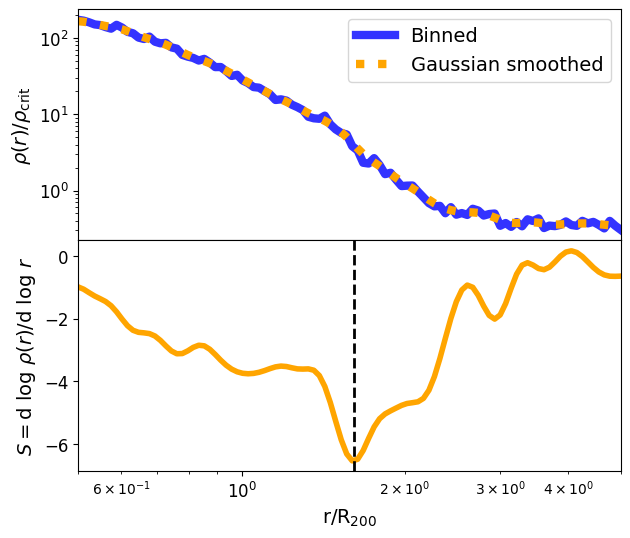

In [5]:
# DM density profile
# Rsp=[]
# rhonorm=2.7753662724817174e-08#*0.6777**2
# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
# start = 0.5
# end = 5
# log_bins = np.logspace(np.log10(start), np.log10(end), 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(hspace=0.0)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# for i in range(DM_density.shape[0]):
for i in range(1):
    ax1.plot(log_bins, DM_density[i]/rhonorm, color='blue',linewidth=6, alpha=0.8, label='Binned')
    smoothed_density = gaussian_filter1d(DM_density[i], sigma=2)
    ax1.plot(log_bins, smoothed_density/rhonorm, color='orange', linestyle=':',linewidth=6, alpha=1,label='Gaussian smoothed')
    # smoothed_density = savgol_filter(DM_density[i], window_length=15, polyorder=3, deriv=0, delta=0.1)
    log_D = np.log(smoothed_density)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    ax2.plot(log_bins, smoothed_d_log_D, color='orange', linestyle='-', linewidth=4, alpha=1) # colors[i % len(colors)]
    
    restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    
    r_splash_index = np.argmin(smoothed_d_log_D_restricted)
    r_splash = rr[r_splash_index]
    
    interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    log_bins_dense = np.linspace(r_splash-0.2, r_splash+0.2, 500)
    smoothed_d_log_D_dense = interp_func(log_bins_dense)
    max_index = np.argmin(smoothed_d_log_D_dense)
    r_splash = log_bins_dense[max_index]
    ax2.axvline(x=r_splash, color='black', linestyle='--', linewidth=2.0)
    # Rsp.append(r_splash)
print(r_splash)

ax1.set_ylabel(r'$\rho(r)/\rho_{\rm crit}$', fontsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.5,5)
ax1.get_xaxis().set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r'${\rm r/R}_{200}$', fontsize=14)
ax2.set_ylabel(r'$S = {\rm d~log}~\rho(r) / {\rm d~log}~r$', fontsize=14)
# ax2.set_ylabel(r'$S$')
ax2.set_xlim(0.5,5)
# ax2.set_ylim(-6.8,3)

# plt.savefig("./figures/DM_density_profile_cluster1.png")

2.165583045351149
2.947348084379035


(0.5, 5)

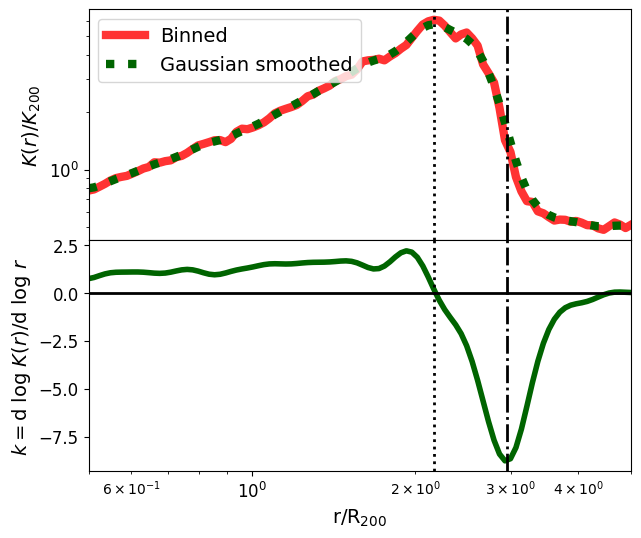

In [6]:
# Gas entropy profile

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(hspace=0.0)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# for i in range(Gas_entropy.shape[0]):
for i in range(1):
    ax1.plot(log_bins, Gas_entropy[i]/K200[i], color='r',linewidth=6, alpha=0.8, label='Binned')
    # smoothed_entropy = savgol_filter(Gas_entropy[i]/K200[i], window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_entropy = gaussian_filter1d(Gas_entropy[i], sigma=2)
    ax1.plot(log_bins, smoothed_entropy/K200[i], color='darkgreen',linestyle=':',linewidth=6, alpha=1,label='Gaussian smoothed')
    log_D = np.log(smoothed_entropy)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    ax2.plot(log_bins, smoothed_d_log_D, color='darkgreen', linestyle='-', linewidth=4, alpha=1) # colors[i % len(colors)]

    r_range_mask = (log_bins >= 0.55) & (log_bins <= 4.5)
    rgav_1_in_range = log_bins[r_range_mask]
    umed_av_in_range = smoothed_entropy[r_range_mask]
    
    if len(umed_av_in_range) > 0:
        max_entropy_index = np.argmax(umed_av_in_range)
        r_shock = rgav_1_in_range[max_entropy_index]

        interp_func = interp1d(log_bins, smoothed_entropy, kind='cubic')
        log_bins_dense = np.linspace(r_shock-0.2, r_shock+0.2, 500)
        smoothed_entropy_dense = interp_func(log_bins_dense)
        max_index = np.argmax(smoothed_entropy_dense)
        r_shock = log_bins_dense[max_index]
    print(r_shock)
    ax1.axvline(x=r_shock, color='black', linestyle=':', linewidth=2.0)
    ax2.axvline(x=r_shock, color='black', linestyle=':', linewidth=2.0)
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=2.0)

    restricted_indices = np.where((log_bins >= 0.5) & (log_bins <= 4.9))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    r_shock2_index = np.argmin(smoothed_d_log_D_restricted)
    r_shock2 = rr[r_shock2_index]
    
    interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    log_bins_dense = np.linspace(r_shock2-0.2, r_shock2+0.1, 500)
    smoothed_d_log_D_dense = interp_func(log_bins_dense)
    max_index = np.argmin(smoothed_d_log_D_dense)
    r_shock2 = log_bins_dense[max_index]
    print(r_shock2)
    ax1.axvline(x=r_shock2, color='black', linestyle='-.', linewidth=2.0)
    ax2.axvline(x=r_shock2, color='black', linestyle='-.', linewidth=2.0)

ax1.set_ylabel(r'$K(r)/K_{200}$', fontsize=14) #/K_{200}
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.5,5)
ax1.get_xaxis().set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=14,loc='upper left')

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel(r'${\rm r/R}_{200}$', fontsize=14)
ax2.set_ylabel(r'$k = {\rm d~log}~K(r) / {\rm d~log}~r$', fontsize=14)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlim(0.5,5)
# ax2.set_ylim(-6,3.5)

# plt.savefig("./figures/GAS_entropy_profile_cluster1.png")

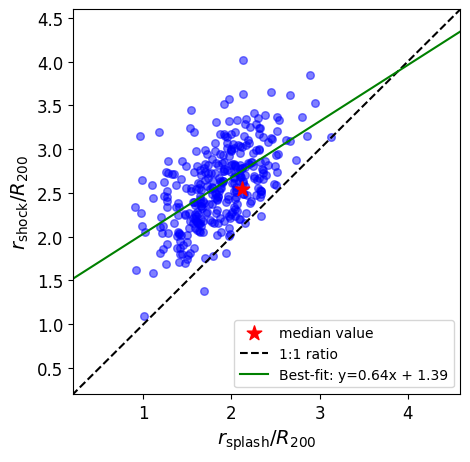

Linear fit equation: y = 0.6424x + 1.3916
R-squared: 0.3205
P-value: 7.5636e-29
Standard error: 0.0521


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Your initial scatter plot
fig = plt.figure(figsize=(5, 5))
plt.scatter(Rsp, Rsh, color='blue', s=30, alpha=0.5)
plt.scatter(r_splash1, r_shock1, color='r', s=120, marker='*', label='median value')
plt.plot([0.1, 6], [0.1, 6], color='black', linestyle='--', label='1:1 ratio')

# Linear fit using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(Rsp, Rsh)

# Plot the best-fit line
x_fit = np.linspace(0.2, 4.6, 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='green', linestyle='-', label=f'Best-fit: y={slope:.2f}x + {intercept:.2f}')

# Add labels and limits
plt.xlabel(r'$r_{\rm splash}/R_{200}$', fontsize=14)
plt.ylabel(r'$r_{\rm shock}/R_{200}$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0.2, 4.6)
plt.ylim(0.2, 4.6)
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Print the fit results with additional statistical info
print(f"Linear fit equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Standard error: {std_err:.4f}")


In [8]:
r_splash, r_shock1,r_shock2 = np.median(Rsp),np.median(Rsh),np.median(Rsh2)
print(r_splash,r_shock1,r_shock2)

1.8708446569032482 2.583757651013871 3.5823483969682846


Best Fit: k = 0.642 ± 0.057
Best Fit: b = 1.392 ± 0.111
Fit: Rsh = 0.64 * Rsp + 1.39
2.1146214371947494 2.583757651013871 1.221853522132773
Best Fit: k = 0.647 ± 0.072
Best Fit: b = 2.376 ± 0.142
Fit: Rsh2 = 0.65 * Rsp + 2.38
2.1146214371947494 3.5823483969682846 1.694084971407751


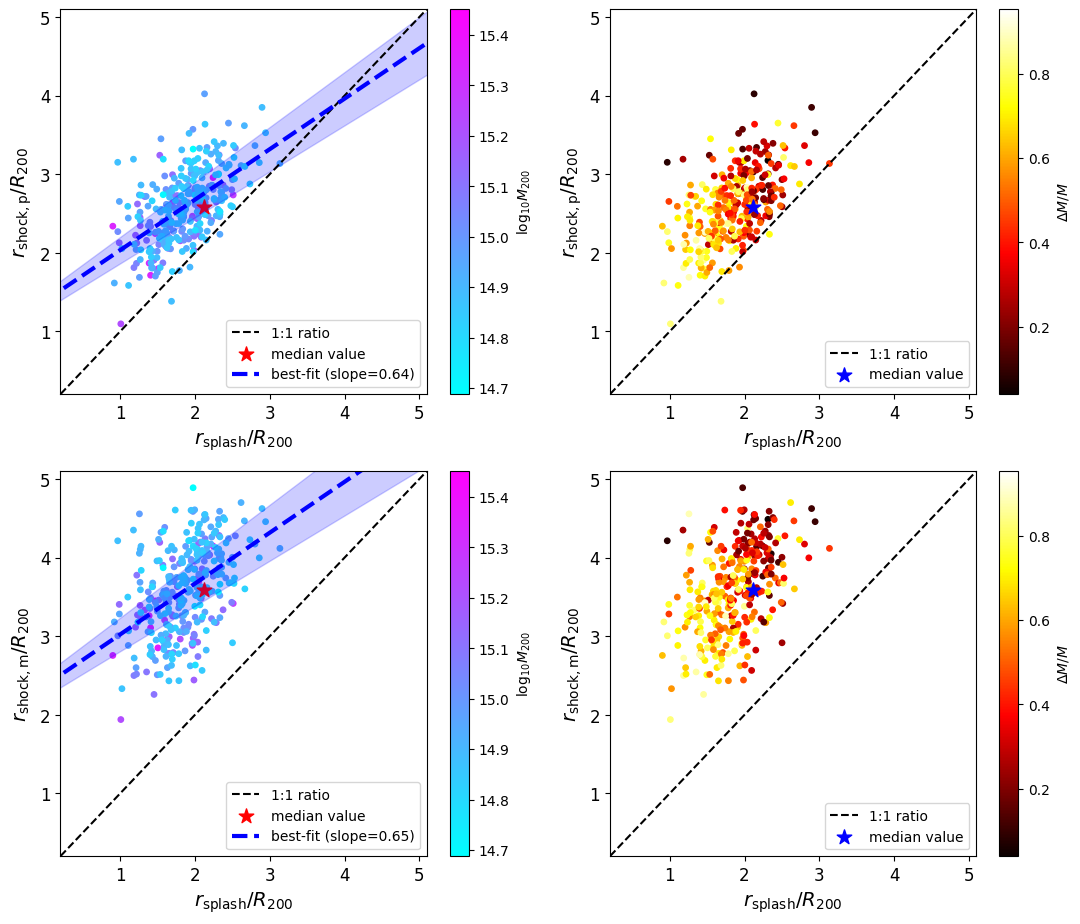

In [9]:
M200 = M200_R200[:,0]
redshifts = History[:, 0]
masses = History[:, 1:]
interp_func = interp1d(redshifts, masses, axis=0, kind='linear', fill_value="extrapolate")
mass_z0 = interp_func(0)
mass_z05 = interp_func(0.5)
accretion_rate = (mass_z0 - mass_z05) / mass_z0

r_splash, r_shock1,r_shock2 = np.median(Rsp),np.median(Rsh),np.median(Rsh2)

Rsp = np.array(Rsp)
Rsh = np.array(Rsh)
Rsh2 = np.array(Rsh2)

fig = plt.figure(figsize=(13, 11))
plt.subplots_adjust(wspace=0.2)
ax1=fig.add_subplot(2,2,1)

slope, intercept, _, _, _ = linregress(Rsp, Rsh)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(Rsp), size=len(Rsp), replace=True)
    Rsp_sample = Rsp[indices]
    Rsh_sample = Rsh[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(Rsp_sample, Rsh_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

norm = plt.Normalize(np.log10(M200).min(), np.log10(M200).max())
cmap = plt.cm.cool
sc1 = ax1.scatter(Rsp, Rsh, c=np.log10(M200), cmap=cmap, norm=norm, s=15)
cbar = plt.colorbar(sc1, ax=ax1)
cbar.set_label(r'log$_{10} M_{200}$')
ax1.plot([0.1, 6], [0.1, 6], color='black', linestyle='--', label='1:1 ratio')
ax1.scatter(r_splash1, r_shock1, color='r',s=120, marker='*', label='median value')

def linear_model(x, k, b):
    return k * x + b

slope, intercept, r_value, p_value, std_err = stats.linregress(Rsp, Rsh)
fitted_Rsh = slope * np.array(Rsp) + intercept

popt, pcov = curve_fit(linear_model, Rsp, Rsh)
k_fit, b_fit = popt
sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）

# Rsp_range = np.linspace(min(Rsp), max(Rsp), 100)
Rsp_range = np.linspace(0, 6, 100)
Rsh_fit = linear_model(Rsp_range, k_fit, b_fit)
Rsh_fit_upper = linear_model(Rsp_range, k_fit + sigma[0], b_fit + sigma[1])
Rsh_fit_lower = linear_model(Rsp_range, k_fit - sigma[0], b_fit - sigma[1])
# plt.plot(Rsp, fitted_Rsh, label=f'best-fit (slope={slope:.2f})', color='b', linestyle='--', linewidth=3)

print(f'Fit: Rsh = {slope:.2f} * Rsp + {intercept:.2f}')

slope, intercept, r_value, p_value, std_err = stats.linregress(Rsp, Rsh)
Rsh_fit = slope * np.array(Rsp) + intercept

x_vals = np.linspace(0, 6, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='b', linestyle='--', linewidth=3, label=f'best-fit (slope={k_fit:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='blue', alpha=0.2)

plt.xlim(0.2,5.1)
plt.ylim(0.2,5.1)
plt.xlabel(r'$r_{\rm splash}/R_{200}$', fontsize=14)
plt.ylabel(r'$r_{\rm shock,p}/R_{200}$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right')

ax2=fig.add_subplot(2,2,2)

norm = plt.Normalize(accretion_rate.min(), accretion_rate.max())
cmap = plt.cm.hot
sc2 = ax2.scatter(Rsp, Rsh, c=accretion_rate, cmap=cmap, norm=norm, s=15)
cbar = plt.colorbar(sc2, ax=ax2)
cbar.set_label(r'$\Delta M / M$')
ax2.plot([0.1, 6], [0.1, 6], color='black', linestyle='--', label='1:1 ratio')
ax2.scatter(r_splash1, r_shock1, color='b',s=120, marker='*', label='median value')

plt.xlim(0.2,5.1)
plt.ylim(0.2,5.1)
plt.xlabel(r'$r_{\rm splash}/R_{200}$', fontsize=14)
plt.ylabel(r'$r_{\rm shock,p}/R_{200}$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right')
print(r_splash1, r_shock1, r_shock1/r_splash1)

ax3=fig.add_subplot(2,2,3)
Rsh2=np.array(Rsh2)
slope, intercept, _, _, _ = linregress(Rsp, Rsh2)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(Rsp), size=len(Rsp), replace=True)
    Rsp_sample = Rsp[indices]
    Rsh2_sample = Rsh2[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(Rsp_sample, Rsh2_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

norm = plt.Normalize(np.log10(M200).min(), np.log10(M200).max())
cmap = plt.cm.cool
sc3 = ax3.scatter(Rsp, Rsh2, c=np.log10(M200), cmap=cmap, norm=norm, s=15)
cbar = plt.colorbar(sc3, ax=ax3)
cbar.set_label(r'log$_{10} M_{200}$')
ax3.plot([0.1, 6], [0.1, 6], color='black', linestyle='--', label='1:1 ratio')
ax3.scatter(r_splash1, r_shock2, color='r',s=120, marker='*', label='median value')

popt, pcov = curve_fit(linear_model, Rsp, Rsh2)
k_fit, b_fit = popt
sigma = np.sqrt(np.diag(pcov))  

# Rsp_range = np.linspace(min(Rsp), max(Rsp), 100)
Rsp_range = np.linspace(0, 5, 100)
Rsh2_fit = linear_model(Rsp_range, k_fit, b_fit)
Rsh2_fit_upper = linear_model(Rsp_range, k_fit + sigma[0], b_fit + sigma[1])
Rsh2_fit_lower = linear_model(Rsp_range, k_fit - sigma[0], b_fit - sigma[1])

# plt.plot(Rsp_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='b', linestyle='--', linewidth=3)
plt.plot(Rsp_range, Rsh2_fit, label=f'best-fit (slope={k_fit:.2f})', color='b', linestyle='--', linewidth=3)
print(f'Fit: Rsh2 = {k_fit:.2f} * Rsp + {b_fit:.2f}')
# plt.fill_between(Rsp_range, Rsh_fit_lower, Rsh_fit_upper, color='red', alpha=0.2, label='1-Sigma Range')

# sns.kdeplot(x=Rsp, y=Rsh, cmap="viridis", shade=False, thresh=0.05, levels=4)

slope, intercept, r_value, p_value, std_err = stats.linregress(Rsp, Rsh2)
Rsh2_fit = slope * np.array(Rsp) + intercept

slope, intercept, r_value, p_value, std_err = stats.linregress(Rsp, Rsh2)
Rsh_fit = slope * np.array(Rsp) + intercept

x_vals = np.linspace(0, 6, 100)
y_vals = slope * x_vals + intercept
# plt.plot(x_vals, y_vals, color='b', linestyle='--', linewidth=3, label=f"Best Fit: k = {slope:.2f}")
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='blue', alpha=0.2)

plt.xlim(0.2,5.1)
plt.ylim(0.2,5.1)
plt.xlabel(r'$r_{\rm splash}/R_{200}$', fontsize=14)
plt.ylabel(r'$r_{\rm shock,m}/R_{200}$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right')

ax4=fig.add_subplot(2,2,4)

norm = plt.Normalize(accretion_rate.min(), accretion_rate.max())
cmap = plt.cm.hot
sc4 = ax4.scatter(Rsp, Rsh2, c=accretion_rate, cmap=cmap, norm=norm, s=15)
cbar = plt.colorbar(sc4, ax=ax4)
cbar.set_label(r'$\Delta M / M$')
ax4.plot([0.1, 6], [0.1, 6], color='black', linestyle='--', label='1:1 ratio')
ax4.scatter(r_splash1, r_shock2, color='b',s=120, marker='*', label='median value')


print(r_splash1, r_shock2, r_shock2/r_splash1)

plt.xlim(0.2,5.1)
plt.ylim(0.2,5.1)
plt.xlabel(r'$r_{\rm splash}/R_{200}$', fontsize=14)
plt.ylabel(r'$r_{\rm shock,m}/R_{200}$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right')
# plt.savefig("./figures/Rsplash_Rshock.png")

Best Fit: k = -1.047 ± 0.000
Best Fit: b = 19.225 ± 0.092
Best Fit: k = -0.832 ± 0.000
Best Fit: b = 15.021 ± 0.076
Best Fit: k = -0.560 ± 0.000
Best Fit: b = 10.231 ± 0.070


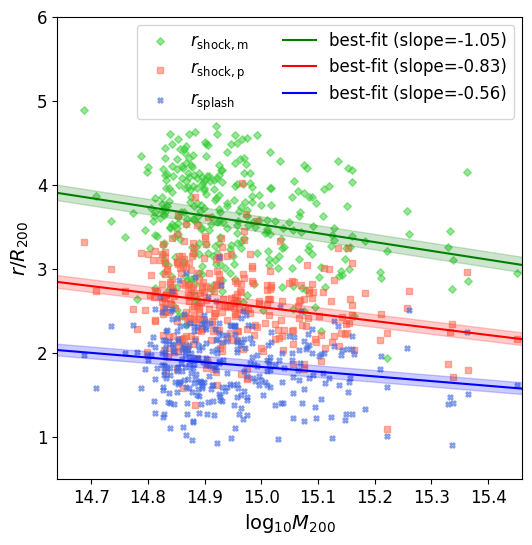

In [10]:
M200 = M200_R200[:,0]
fig = plt.figure(figsize=(6, 6))
ax1=fig.add_subplot(1,1,1)
ax1.scatter(np.log10(M200), np.array(Rsh2), marker='D', color='limegreen',s=15, alpha=0.5, label=r'$r_{\rm shock,m}$')
ax1.scatter(np.log10(M200), np.array(Rsh), marker=',', color='tomato',s=15, alpha=0.5, label=r'$r_{\rm shock,p}$')
ax1.scatter(np.log10(M200), np.array(Rsp), marker='X', color='royalblue',s=15, alpha=0.5, label=r'$r_{\rm splash}$')

slope, intercept, _, _, _ = linregress(np.log10(M200), Rsh2)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(np.log10(M200)), size=len(np.log10(M200)), replace=True)
    M200_sample = M200[indices]
    Rsh2_sample = Rsh2[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(M200_sample, Rsh2_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

x_vals = np.linspace(14.5, 15.5, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='green', label=f'best-fit (slope={slope:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='green', alpha=0.2)


slope, intercept, _, _, _ = linregress(np.log10(M200), Rsh)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(np.log10(M200)), size=len(np.log10(M200)), replace=True)
    M200_sample = M200[indices]
    Rsh_sample = Rsh[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(M200_sample, Rsh_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

x_vals = np.linspace(14.5, 15.5, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'best-fit (slope={slope:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='red', alpha=0.2)

slope, intercept, _, _, _ = linregress(np.log10(M200), Rsp)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(np.log10(M200)), size=len(np.log10(M200)), replace=True)
    M200_sample = M200[indices]
    Rsp_sample = Rsp[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(M200_sample, Rsp_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

x_vals = np.linspace(14.5, 15.5, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='blue', label=f'best-fit (slope={slope:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='blue', alpha=0.2)

# # ax1.scatter(np.log10(M200), np.array(Rsh2), color='limegreen',s=15, alpha=0.6, label=r'$r_{\rm shock2}$')
# popt, pcov = curve_fit(linear_model, np.log10(M200), Rsh2)
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）

# # M200_range = np.linspace(min(np.log10(M200)), max(np.log10(M200)), 100)
# M200_range = np.linspace(14, 16, 100)
# Rsh2_fit = linear_model(M200_range, k_fit, b_fit)
# Rsh2_fit_upper = linear_model(M200_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsh2_fit_lower = linear_model(M200_range, k_fit - sigma[0], b_fit - sigma[1])

# # plt.plot(M200_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='red', linestyle='--', linewidth=2)
# plt.plot(M200_range, Rsh2_fit, color='g', linestyle='--', linewidth=3, label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Rsh2 = {k_fit:.2f} * M200 + {b_fit:.2f}')

# popt, pcov = curve_fit(linear_model, np.log10(M200), Rsh)
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）
# # M200_range = np.linspace(min(np.log10(M200)), max(np.log10(M200)), 100)
# M200_range = np.linspace(14, 16, 100)
# Rsh_fit = linear_model(M200_range, k_fit, b_fit)
# Rsh_fit_upper = linear_model(M200_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsh_fit_lower = linear_model(M200_range, k_fit - sigma[0], b_fit - sigma[1])

# # plt.plot(M200_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='red', linestyle='--', linewidth=2)
# plt.plot(M200_range, Rsh_fit, color='red', linestyle='--', linewidth=3, label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Rsh = {k_fit:.2f} * M200 + {b_fit:.2f}')

# # ax1.scatter(np.log10(M200), np.array(Rsp), color='royalblue',s=15, alpha=0.6, label=r'$r_{\rm splash}$')
# popt, pcov = curve_fit(linear_model, np.log10(M200), Rsp)
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）

# # M200_range = np.linspace(min(np.log10(M200)), max(np.log10(M200)), 100)
# M200_range = np.linspace(14, 16, 100)
# Rsp_fit = linear_model(M200_range, k_fit, b_fit)
# Rsp_fit_upper = linear_model(M200_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsp_fit_lower = linear_model(M200_range, k_fit - sigma[0], b_fit - sigma[1])

# # plt.plot(M200_range, Rsp_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='b', linestyle='--', linewidth=2)
# plt.plot(M200_range, Rsp_fit, color='b', linestyle='--', linewidth=3,label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Rsp = {k_fit:.2f} * M200 + {b_fit:.2f}')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel(r'$r/R_{200}$', fontsize=14)
plt.xlabel(r'log$_{10} M_{200}$', fontsize=14)
plt.xlim(14.64,15.46)
plt.ylim(0.5,6)
plt.legend(ncols=2, fontsize=12)
plt.savefig("./figures/Mass_radius.png")

In [11]:
import numpy as np
import scipy.stats as stats

log_M200 = np.log10(M200)  # 对 M200 取 log10
Rsh2 = np.array(Rsh2)
Rsh= np.array(Rsh)
Rsp = np.array(Rsp)
redshifts = History[:, 0]
masses = History[:, 1:]
interp_func = interp1d(redshifts, masses, axis=0, kind='linear', fill_value="extrapolate")
mass_z0 = interp_func(0)
mass_z05 = interp_func(0.5)
accretion_rate = (mass_z0 - mass_z05) / mass_z0
accretion_rate = np.array(accretion_rate)

def bootstrap_spearman(x, y, n_bootstrap=1000):
    n = len(x)
    boot_corrs = []
    for _ in range(n_bootstrap):
        indices = np.random.choice(n, n, replace=True)
        boot_corr, _ = stats.spearmanr(x[indices], y[indices])
        boot_corrs.append(boot_corr)
    return np.percentile(boot_corrs, [16, 84])  # 返回 1sigma 区间 (16th, 84th)

results = {}
for name, data in zip(["Rsh2", "Rsh"], [Rsh2, Rsh]):
    spearman_corr, p_value = stats.spearmanr(Rsp, data)  # 计算 Spearman 系数
    conf_int = bootstrap_spearman(Rsp, data)            # 自助法计算置信区间
    results[name] = {
        "Spearman": spearman_corr,
        "P-value": p_value,
        "Confidence Interval": conf_int,
    }
for key, value in results.items():
    print(f"{key}: Spearman={value['Spearman']:.3f}, P-value={value['P-value']:.3f}, "
          f"1σ Confidence Interval={value['Confidence Interval']}")

results = {}
for name, data in zip(["Rsh2", "Rsh", "Rsp"], [Rsh2, Rsh, Rsp]):
    spearman_corr, p_value = stats.spearmanr(log_M200, data)  # 计算 Spearman 系数
    conf_int = bootstrap_spearman(log_M200, data)            # 自助法计算置信区间
    results[name] = {
        "Spearman": spearman_corr,
        "P-value": p_value,
        "Confidence Interval": conf_int,
    }
for key, value in results.items():
    print(f"{key}: Spearman={value['Spearman']:.3f}, P-value={value['P-value']:.3f}, "
          f"1σ Confidence Interval={value['Confidence Interval']}")

results = {}
for name, data in zip(["Rsh2", "Rsh", "Rsp"], [Rsh2, Rsh, Rsp]):
    spearman_corr, p_value = stats.spearmanr(accretion_rate, data)  # 计算 Spearman 系数
    conf_int = bootstrap_spearman(accretion_rate, data)            # 自助法计算置信区间
    results[name] = {
        "Spearman": spearman_corr,
        "P-value": p_value,
        "Confidence Interval": conf_int,
    }
for key, value in results.items():
    print(f"{key}: Spearman={value['Spearman']:.3f}, P-value={value['P-value']:.3f}, "
          f"1σ Confidence Interval={value['Confidence Interval']}")


Rsh2: Spearman=0.469, P-value=0.000, 1σ Confidence Interval=[0.42342607 0.51308363]
Rsh: Spearman=0.564, P-value=0.000, 1σ Confidence Interval=[0.5214767  0.60208862]
Rsh2: Spearman=-0.182, P-value=0.001, 1σ Confidence Interval=[-0.23237146 -0.12748443]
Rsh: Spearman=-0.201, P-value=0.000, 1σ Confidence Interval=[-0.25113994 -0.15063955]
Rsp: Spearman=-0.139, P-value=0.013, 1σ Confidence Interval=[-0.19592163 -0.08241269]
Rsh2: Spearman=-0.508, P-value=0.000, 1σ Confidence Interval=[-0.55340613 -0.46061782]
Rsh: Spearman=-0.476, P-value=0.000, 1σ Confidence Interval=[-0.52102587 -0.42644457]
Rsp: Spearman=-0.566, P-value=0.000, 1σ Confidence Interval=[-0.6059074  -0.52389938]


In [12]:
# import numpy as np
# import scipy.stats as stats

# log_M200 = np.log10(M200)  # 对 M200 取 log10
# Rsh2 = np.array(Rsh2)
# Rsh= np.array(Rsh)
# Rsp = np.array(Rsp)

# def bootstrap_spearman(x, y, n_bootstrap=1000):
#     n = len(x)
#     boot_corrs = []
#     for _ in range(n_bootstrap):
#         indices = np.random.choice(n, n, replace=True)
#         boot_corr, _ = stats.spearmanr(x[indices], y[indices])
#         boot_corrs.append(boot_corr)
#     return np.percentile(boot_corrs, [16, 84])  # 返回 1sigma 区间 (16th, 84th)


# results = {}
# for name, data in zip(["Rsh2", "Rsh", "Rsp"], [Rsh2, Rsh, Rsp]):
#     spearman_corr, p_value = stats.spearmanr(log_M200, data)  # 计算 Spearman 系数
#     conf_int = bootstrap_spearman(log_M200, data)            # 自助法计算置信区间
#     results[name] = {
#         "Spearman": spearman_corr,
#         "P-value": p_value,
#         "Confidence Interval": conf_int,
#     }

# for key, value in results.items():
#     print(f"{key}: Spearman={value['Spearman']:.3f}, P-value={value['P-value']:.3f}, "
#           f"1σ Confidence Interval={value['Confidence Interval']}")

# fig = plt.figure(figsize=(8, 8))
# ax1 = fig.add_subplot(1, 1, 1)

# # ax1.scatter(log_M200, Rsh2, marker='D', color='limegreen', s=15, alpha=0.5, label=r'$r_{\rm shock,m}$')
# # ax1.scatter(log_M200, Rsh, marker=',', color='tomato', s=15, alpha=0.5, label=r'$r_{\rm shock,p}$')
# # ax1.scatter(log_M200, Rsp, marker='X', color='royalblue', s=15, alpha=0.5, label=r'$r_{\rm splash}$')

# # # ax1.scatter(log_M200, Rsh2, marker='D', color='limegreen', s=15, alpha=0.5, label=r'$r_{\rm shock,m}$')
# # ax1.plot(np.sort(log_M200), fit_Rsh2[1], color="limegreen", label=r"Fit $r_{\rm shock,m}$")
# # ax1.fill_between(np.sort(log_M200), fit_Rsh2[2], fit_Rsh2[3], color="limegreen", alpha=0.3, label=r"1$\sigma$ $r_{\rm shock,m}$")

# # # 绘制 Rsh 的拟合曲线和置信区间
# # # ax1.scatter(log_M200, Rsh, marker=',', color='tomato', s=15, alpha=0.5, label=r'$r_{\rm shock,p}$')
# # ax1.plot(np.sort(log_M200), fit_Rsh[1], color="tomato", label=r"Fit $r_{\rm shock,p}$")
# # ax1.fill_between(np.sort(log_M200), fit_Rsh[2], fit_Rsh[3], color="tomato", alpha=0.3, label=r"1$\sigma$ $r_{\rm shock,p}$")

# # # 绘制 Rsp 的拟合曲线和置信区间
# # # ax1.scatter(log_M200, Rsp, marker='X', color='royalblue', s=15, alpha=0.5, label=r'$r_{\rm splash}$')
# # ax1.plot(np.sort(log_M200), fit_Rsp[1], color="royalblue", label=r"Fit $r_{\rm splash}$")
# # ax1.fill_between(np.sort(log_M200), fit_Rsp[2], fit_Rsp[3], color="royalblue", alpha=0.3, label=r"1$\sigma$ $r_{\rm splash}$")


# # # 在图中标注 Spearman 相关系数
# # for idx, (name, color, data) in enumerate(zip(
# #     ["Rsh2", "Rsh", "Rsp"],
# #     ["limegreen", "tomato", "royalblue"],
# #     [Rsh2, Rsh, Rsp],
# # )):
# #     spearman_corr = results[name]["Spearman"]
# #     conf_int = results[name]["Confidence Interval"]
# #     label = f"{name}: $\\rho={spearman_corr:.2f}$\n(1σ: [{conf_int[0]:.2f}, {conf_int[1]:.2f}])"
# #     ax1.text(0.1, 0.9 - idx * 0.1, label, color=color, transform=ax1.transAxes, fontsize=12)


# plt.tick_params(axis='both', which='major', labelsize=12)
# plt.ylabel(r'$r/R_{200}$', fontsize=14)
# plt.xlabel(r'log$_{10} M_{200}$', fontsize=14)
# plt.xlim(14.64,15.46)
# plt.ylim(0.5,6)
# plt.legend(ncols=2, fontsize=12)
# plt.show()

Best Fit: k = -1.344 ± 0.127
Best Fit: b = 4.271 ± 0.065
Best Fit: k = -1.051 ± 0.107
Best Fit: b = 3.127 ± 0.056
Best Fit: k = -0.980 ± 0.093
Best Fit: b = 2.363 ± 0.050


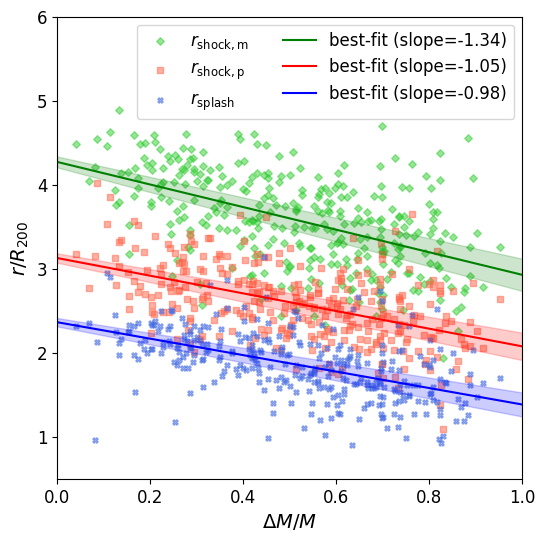

In [13]:
redshifts = History[:, 0]
masses = History[:, 1:]
interp_func = interp1d(redshifts, masses, axis=0, kind='linear', fill_value="extrapolate")
mass_z0 = interp_func(0)
mass_z05 = interp_func(0.5)
accretion_rate = (mass_z0 - mass_z05) / mass_z0

fig = plt.figure(figsize=(6, 6))
ax1=fig.add_subplot(1,1,1)
ax1.scatter(accretion_rate, np.array(Rsh2), marker='D', color='limegreen',s=15, alpha=0.5, label=r'$r_{\rm shock,m}$')
ax1.scatter(accretion_rate, np.array(Rsh), marker=',', color='tomato',s=15, alpha=0.5, label=r'$r_{\rm shock,p}$')
ax1.scatter(accretion_rate, np.array(Rsp), marker='X', color='royalblue',s=15, alpha=0.5, label=r'$r_{\rm splash}$')

slope, intercept, _, _, _ = linregress(accretion_rate, Rsh2)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(accretion_rate), size=len(accretion_rate), replace=True)
    accretion_rate_sample = accretion_rate[indices]
    Rsh2_sample = Rsh2[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(accretion_rate_sample, Rsh2_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

x_vals = np.linspace(0, 1, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='green', label=f'best-fit (slope={slope:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='green', alpha=0.2)


slope, intercept, _, _, _ = linregress(accretion_rate, Rsh)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(accretion_rate), size=len(accretion_rate), replace=True)
    accretion_rate_sample = accretion_rate[indices]
    Rsh_sample = Rsh[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(accretion_rate_sample, Rsh_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

x_vals = np.linspace(0, 1, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'best-fit (slope={slope:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='red', alpha=0.2)

slope, intercept, _, _, _ = linregress(accretion_rate, Rsp)
n_bootstrap = 1000  # Bootstrap 采样次数
slopes = []
intercepts = []

for _ in range(n_bootstrap):
    # 使用 np.random.choice 实现重采样
    indices = np.random.choice(len(accretion_rate), size=len(accretion_rate), replace=True)
    accretion_rate_sample = accretion_rate[indices]
    Rsp_sample = Rsp[indices]
    # 计算每次重采样的斜率和截距
    slope_sample, intercept_sample, _, _, _ = linregress(accretion_rate_sample, Rsp_sample)
    slopes.append(slope_sample)
    intercepts.append(intercept_sample)

slope_sigma = np.std(slopes)
intercept_sigma = np.std(intercepts)

print(f"Best Fit: k = {slope:.3f} ± {slope_sigma:.3f}")
print(f"Best Fit: b = {intercept:.3f} ± {intercept_sigma:.3f}")

x_vals = np.linspace(0, 1, 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='blue', label=f'best-fit (slope={slope:.2f})')
y_upper = (slope + slope_sigma) * x_vals + (intercept + intercept_sigma)
y_lower = (slope - slope_sigma) * x_vals + (intercept - intercept_sigma)
plt.fill_between(x_vals, y_lower, y_upper, color='blue', alpha=0.2)

# # ax1.scatter(accretion_rate, np.array(Rsh2), color='limegreen',s=15, alpha=0.6, label=r'$r_{\rm shock}$')
# popt, pcov = curve_fit(linear_model, accretion_rate, Rsh2)
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）
# # accretion_rate_range = np.linspace(min(accretion_rate), max(accretion_rate), 100)
# accretion_rate_range = np.linspace(0, 2, 100)
# Rsh2_fit = linear_model(accretion_rate_range, k_fit, b_fit)
# Rsh2_fit_upper = linear_model(accretion_rate_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsh2_fit_lower = linear_model(accretion_rate_range, k_fit - sigma[0], b_fit - sigma[1])
# # plt.plot(M200_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='red', linestyle='--', linewidth=2)
# plt.plot(accretion_rate_range, Rsh2_fit, color='g', linestyle='--', linewidth=3,label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Rsh2 = {k_fit:.2f} * acrretion + {b_fit:.2f}')


# popt, pcov = curve_fit(linear_model, accretion_rate, Rsh)
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）
# # accretion_rate_range = np.linspace(min(accretion_rate), max(accretion_rate), 100)
# accretion_rate_range = np.linspace(0, 2, 100)
# Rsh_fit = linear_model(accretion_rate_range, k_fit, b_fit)
# Rsh_fit_upper = linear_model(accretion_rate_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsh_fit_lower = linear_model(accretion_rate_range, k_fit - sigma[0], b_fit - sigma[1])
# # plt.plot(M200_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='red', linestyle='--', linewidth=2)
# plt.plot(accretion_rate_range, Rsh_fit, color='r', linestyle='--', linewidth=3,label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Rsh = {k_fit:.2f} * acrretion + {b_fit:.2f}')


# # ax1.scatter(accretion_rate, np.array(Rsp), color='royalblue',s=15, alpha=0.6, label=r'$r_{\rm splash}$')
# popt, pcov = curve_fit(linear_model, accretion_rate, Rsp)
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）
# # accretion_rate_range = np.linspace(min(accretion_rate), max(accretion_rate), 100)
# accretion_rate_range = np.linspace(0, 2, 100)
# Rsp_fit = linear_model(accretion_rate_range, k_fit, b_fit)
# Rsp_fit_upper = linear_model(accretion_rate_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsp_fit_lower = linear_model(accretion_rate_range, k_fit - sigma[0], b_fit - sigma[1])
# # plt.plot(M200_range, Rsp_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='b', linestyle='--', linewidth=2)
# plt.plot(accretion_rate_range, Rsp_fit, color='b', linestyle='--', linewidth=3,label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Rsp = {k_fit:.2f} * acrretion + {b_fit:.2f}')

plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel(r'$r/R_{200}$', fontsize=14)
plt.xlabel(r'$\Delta M / M$', fontsize=14)
plt.xlim(0,1)
plt.ylim(0.5,6)
plt.legend(ncols=2, fontsize=12)
plt.savefig("./figures/Accretion_radius.png")

In [14]:
ratio = np.array(Rsh) / np.array(Rsp)

# 计算比值的均值和标准差 (1 sigma)
mean_ratio = np.mean(ratio)
sigma_ratio = np.std(ratio, ddof=1)  # ddof=1用于无偏估计

median_ratio = np.median(ratio)
lower_sigma = np.percentile(ratio, 16)  # 下限 (-1 sigma)
upper_sigma = np.percentile(ratio, 84)  # 上限 (+1 sigma)

# 计算上下限误差
error_lower = median_ratio - lower_sigma
error_upper = upper_sigma - median_ratio

print("Rsh/Rsp的中位数比值:", median_ratio)
print("下限误差:", error_lower)
print("上限误差:", error_upper)

print("Rsh/Rsp的比值均值:", mean_ratio)
print("1 sigma误差:", sigma_ratio)

Rsh/Rsp的中位数比值: 1.3791833495232202
下限误差: 0.2117572982686584
上限误差: 0.27367292693058265
Rsh/Rsp的比值均值: 1.4309281286668953
1 sigma误差: 0.3074915843584836


In [15]:
ratio = np.array(Rsh2) / np.array(Rsp)

# 计算比值的均值和标准差 (1 sigma)
mean_ratio = np.mean(ratio)
sigma_ratio = np.std(ratio, ddof=1)  # ddof=1用于无偏估计

median_ratio = np.median(ratio)
lower_sigma = np.percentile(ratio, 16)  # 下限 (-1 sigma)
upper_sigma = np.percentile(ratio, 84)  # 上限 (+1 sigma)

# 计算上下限误差
error_lower = median_ratio - lower_sigma
error_upper = upper_sigma - median_ratio

print("Rsh/Rsp的中位数比值:", median_ratio)
print("下限误差:", error_lower)
print("上限误差:", error_upper)

print("Rsh/Rsp的比值均值:", mean_ratio)
print("1 sigma误差:", sigma_ratio)

Rsh/Rsp的中位数比值: 1.9140799625851084
下限误差: 0.3094550678784511
上限误差: 0.42024350891727624
Rsh/Rsp的比值均值: 1.9921059416156033
1 sigma误差: 0.4496690771402734


In [18]:
def median_and_1sigma(data):
    """
    计算数据的中位数及 1 sigma 误差（非对称）
    参数:
        data (array-like): 输入的数据数组
    返回:
        median (float): 中位数
        lower_sigma (float): 下限误差 (中位数 - 16th 分位数)
        upper_sigma (float): 上限误差 (84th 分位数 - 中位数)
    """
    median = np.median(data)
    lower_sigma = median - np.percentile(data, 16)
    upper_sigma = np.percentile(data, 84) - median
    return median, lower_sigma, upper_sigma

# 分别计算 Rsh 和 Rsp 的中位数及 1 sigma 误差
Rsh2_median, Rsh2_lower_sigma, Rsh2_upper_sigma = median_and_1sigma(Rsh2)
Rsh_median, Rsh_lower_sigma, Rsh_upper_sigma = median_and_1sigma(Rsh)
Rsp_median, Rsp_lower_sigma, Rsp_upper_sigma = median_and_1sigma(Rsp)

Rspgas_median, Rspgas_lower_sigma, Rspgas_upper_sigma = median_and_1sigma(Rsp_gas)
Rspstar_median, Rspstar_lower_sigma, Rspstar_upper_sigma = median_and_1sigma(Rsp_star)

# 输出结果
print(f"Rsh2 的中位数: {Rsh2_median:.3f}")
print(f"Rsh2 的 1 sigma 下限误差: {Rsh2_lower_sigma:.3f}")
print(f"Rsh2 的 1 sigma 上限误差: {Rsh2_upper_sigma:.3f}")
print(f"Rsh 的中位数: {Rsh_median:.3f}")
print(f"Rsh 的 1 sigma 下限误差: {Rsh_lower_sigma:.3f}")
print(f"Rsh 的 1 sigma 上限误差: {Rsh_upper_sigma:.3f}")
print(f"Rsp 的中位数: {Rsp_median:.3f}")
print(f"Rsp 的 1 sigma 下限误差: {Rsp_lower_sigma:.3f}")
print(f"Rsp 的 1 sigma 上限误差: {Rsp_upper_sigma:.3f}")

print(f"Rsp 的中位数: {Rspgas_median:.3f}")
print(f"Rsp 的 1 sigma 下限误差: {Rspgas_lower_sigma:.3f}")
print(f"Rsp 的 1 sigma 上限误差: {Rspgas_upper_sigma:.3f}")
print(f"Rsp 的中位数: {Rspstar_median:.3f}")
print(f"Rsp 的 1 sigma 下限误差: {Rspstar_lower_sigma:.3f}")
print(f"Rsp 的 1 sigma 上限误差: {Rspstar_upper_sigma:.3f}")


Rsh2 的中位数: 3.582
Rsh2 的 1 sigma 下限误差: 0.622
Rsh2 的 1 sigma 上限误差: 0.574
Rsh 的中位数: 2.584
Rsh 的 1 sigma 下限误差: 0.426
Rsh 的 1 sigma 上限误差: 0.454
Rsp 的中位数: 1.871
Rsp 的 1 sigma 下限误差: 0.407
Rsp 的 1 sigma 上限误差: 0.385
Rsp 的中位数: 1.715
Rsp 的 1 sigma 下限误差: 0.448
Rsp 的 1 sigma 上限误差: 0.552
Rsp 的中位数: 2.066
Rsp 的 1 sigma 下限误差: 0.390
Rsp 的 1 sigma 上限误差: 0.423


In [19]:
# M200 = M200_R200[:,0]
# fig = plt.figure(figsize=(5, 11))
# ax1=fig.add_subplot(2,1,1)
# ax1.scatter(np.log10(M200), np.array(Rsh)/np.array(Rsp), color='tomato',s=15, alpha=0.6)

# popt, pcov = curve_fit(linear_model, np.log10(M200), np.array(Rsh)/np.array(Rsp))
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov))  # 参数的标准差（1-sigma 范围）

# # M200_range = np.linspace(min(np.log10(M200)), max(np.log10(M200)), 100)
# M200_range = np.linspace(14, 16, 100)
# Rsh_fit = linear_model(M200_range, k_fit, b_fit)
# Rsh_fit_upper = linear_model(M200_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsh_fit_lower = linear_model(M200_range, k_fit - sigma[0], b_fit - sigma[1])

# # plt.plot(M200_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='red', linestyle='--', linewidth=2)
# ax1.plot(M200_range, Rsh_fit, color='red', linestyle='--', linewidth=3, label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Ratio = {k_fit:.2f} * M200 + {b_fit:.2f}')

# ax1.set_ylabel(r'$r_{\rm shock}/r_{\rm splash}$', fontsize=14)
# ax1.set_xlabel(r'log$_{10} M_{200}$', fontsize=14)
# ax1.set_xlim(14.6,15.5)
# ax1.tick_params(axis='both', which='major', labelsize=12)
# plt.legend()
# ##############################
# ax2=fig.add_subplot(2,1,2)
# ax2.scatter(accretion_rate, np.array(Rsh)/np.array(Rsp), color='tomato',s=15, alpha=0.6)

# popt, pcov = curve_fit(linear_model, accretion_rate, np.array(Rsh)/np.array(Rsp))
# k_fit, b_fit = popt
# sigma = np.sqrt(np.diag(pcov)) 

# # M200_range = np.linspace(min(np.log10(M200)), max(np.log10(M200)), 100)
# accretion_rate_range = np.linspace(0, 1, 100)
# Rsh_fit = linear_model(accretion_rate_range, k_fit, b_fit)
# Rsh_fit_upper = linear_model(accretion_rate_range, k_fit + sigma[0], b_fit + sigma[1])
# Rsh_fit_lower = linear_model(accretion_rate_range, k_fit - sigma[0], b_fit - sigma[1])

# # plt.plot(M200_range, Rsh_fit, label=f'Fit: Rsh = {k_fit:.2f} * Rsp + {b_fit:.2f}', color='red', linestyle='--', linewidth=2)
# ax2.plot(accretion_rate_range, Rsh_fit, color='red', linestyle='--', linewidth=3, label=f'best-fit (slope={k_fit:.2f})')
# print(f'Fit: Ratio = {k_fit:.2f} * accretion_rate + {b_fit:.2f}')

# ax2.tick_params(axis='both', which='major', labelsize=12)
# ax2.set_xlabel(r'$\Delta M / M$', fontsize=14)
# ax2.set_ylabel(r'$r_{\rm shock}/r_{\rm splash}$', fontsize=14)
# ax2.set_xlim(0,1)
# plt.legend()
# # plt.savefig("./figures/Ratio_Mass_Accretion.png")

In [20]:
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import scipy.integrate as spi
import h5py
import os

from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
import profile_tools as pt

mtt=reload(mtt)
st=reload(st)
ht=reload(ht)
gt=reload(gt)

In [21]:
snap=st.SnapshotTools('/fred/oz009/cpower/TheThreeHundred/NewMDCLUSTER_001/snap_128','3')
halo=ht.HaloTools('/fred/oz009/cpower/TheThreeHundred/NewMDCLUSTER_001/GIZMO_7k-NewMDCLUSTER_001.snap_128.z0.000','AHF')

snap.ReadSnapshot()
snap.UnitConversion(convert_to_physical=False,convert_to_littleh=False)
snap.LoadParticlesByType('all')
halo.ReadHaloCatalogue()

Reading data from /fred/oz009/cpower/TheThreeHundred/NewMDCLUSTER_001/snap_128.hdf5
Simulation scale factor: 1.000000
Number of particles: 0131819696
Number of particle types: 6
/fred/oz009/cpower/TheThreeHundred/NewMDCLUSTER_001/GIZMO_7k-NewMDCLUSTER_001.snap_128.z0.000.AHF_halos


Text(-8.277777777777777, 0.5, '$z~[h^{-1} {\\rm Mpc}]$')

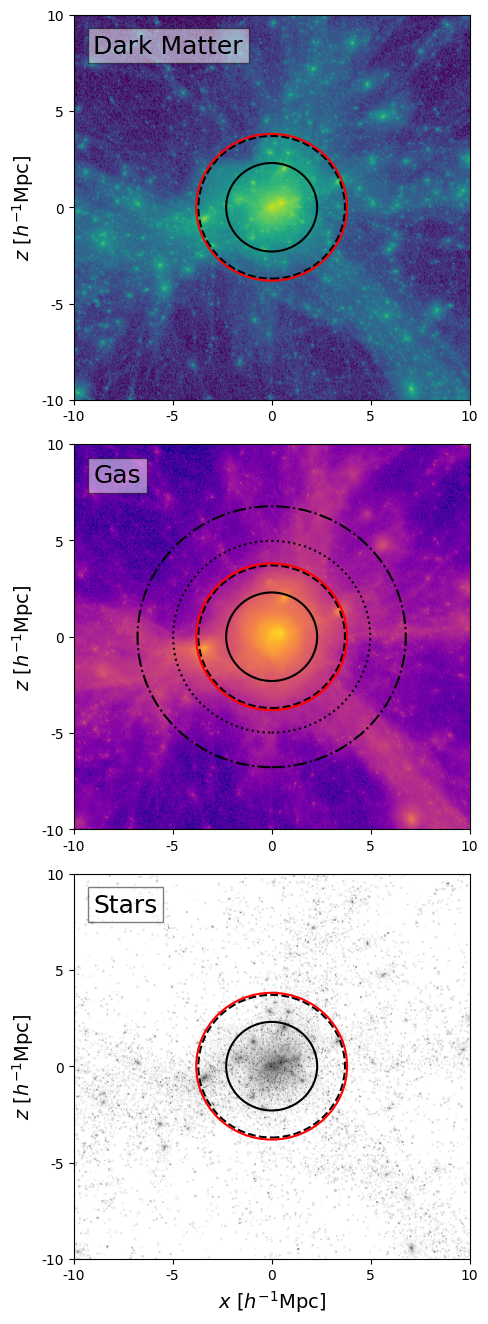

In [22]:
def plot_components(pos,poscen,size,lbox,cubic=False,colourmap='plasma',grid_size=512,**kwargs):    
    if cubic==True:
        ipick=st.select_particles(pos,poscen,size,geometry='cubic',periodic=True,scale_length=lbox)
    else:
        ipick=st.select_particles(pos,poscen,size,geometry='spherical',periodic=True,scale_length=lbox)        
    dpos=pos[ipick]-poscen
    dpos=np.where(dpos>0.5*lbox,dpos-lbox,dpos)
    dpos=np.where(dpos<-0.5*lbox,dpos+lbox,dpos)    
    fig=plt.hexbin(dpos[:,0],dpos[:,2],bins='log',gridsize=grid_size,cmap=colourmap)
    return fig

R200_mean=3809.87 #from Kris

ihalo=0
fig = plt.figure(figsize=(5, 13.3))
gs = GridSpec(nrows=3, ncols=1)
# Plot DM
ax0 = fig.add_subplot(gs[0, 0])
figd = plot_components(snap.dm.pos, halo.GroupPos[ihalo], 10000, snap.BoxSize, colourmap='viridis', grid_size=512, cubic=True)
circle1 = plt.Circle((0,0), halo.GroupR200[ihalo], color='black', fill=False, linestyle='-', linewidth=1.5)
circle2 = plt.Circle((0,0), halo.GroupR200[ihalo]*Rsp[0], color='black', fill=False, linestyle='--', linewidth=1.5)
circle5 = plt.Circle((0,0), R200_mean, color='red', fill=False, linestyle='-', linewidth=1.5)
ax0.add_patch(circle1)
ax0.add_patch(circle2)
ax0.add_patch(circle5)
ax0.text(0.05, 0.95, 'Dark Matter', transform=ax0.transAxes, fontsize=18, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.ylabel(r'$z~[h^{-1} {\rm Mpc}]$', fontsize=14)
plt.xlim(-10000,10000)
plt.ylim(-10000,10000)
# 使用新的刻度标注，以 Mpc 为单位显示
ax0.set_xticks([-10000, -5000, 0, 5000, 10000])
ax0.set_xticklabels([-10, -5, 0, 5, 10])  # 将刻度值从 kpc 转换为 Mpc
ax0.set_yticks([-10000, -5000, 0, 5000, 10000])
ax0.set_yticklabels([-10, -5, 0, 5, 10])

# Plot gas
ax1 = fig.add_subplot(gs[1, 0])
figg = plot_components(snap.gas.pos, halo.GroupPos[ihalo], 10000, snap.BoxSize, colourmap='plasma', grid_size=512, cubic=True)
ax1.text(0.05, 0.95, 'Gas', transform=ax1.transAxes, fontsize=18, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
circle1 = plt.Circle((0,0), halo.GroupR200[ihalo], color='black', fill=False, linestyle='-', linewidth=1.5)
circle2 = plt.Circle((0,0), halo.GroupR200[ihalo]*Rsp[0], color='black', fill=False, linestyle='--', linewidth=1.5)
circle3 = plt.Circle((0,0), halo.GroupR200[ihalo]*Rsh[0], color='black', fill=False, linestyle=':', linewidth=1.5)
circle4 = plt.Circle((0,0), halo.GroupR200[ihalo]*Rsh2[0], color='black', fill=False, linestyle='-.', linewidth=1.5)
circle5 = plt.Circle((0,0), R200_mean, color='red', fill=False, linestyle='-', linewidth=1.5)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.add_patch(circle4)
ax1.add_patch(circle5)
# 使用新的刻度标注，以 Mpc 为单位显示
ax1.set_xticks([-10000, -5000, 0, 5000, 10000])
ax1.set_xticklabels([-10, -5, 0, 5, 10])  # 将刻度值从 kpc 转换为 Mpc
ax1.set_yticks([-10000, -5000, 0, 5000, 10000])
ax1.set_yticklabels([-10, -5, 0, 5, 10])

plt.ylabel(r'$z~[h^{-1} {\rm Mpc}]$', fontsize=14)
plt.xlim(-10000,10000)
plt.ylim(-10000,10000)

# Plot stars
ax2 = fig.add_subplot(gs[2, 0])
figs = plot_components(snap.star.pos, halo.GroupPos[ihalo], 10000, snap.BoxSize, colourmap='Greys', grid_size=512, cubic=True)
ax2.text(0.05, 0.95, 'Stars', transform=ax2.transAxes, fontsize=18, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
circle1 = plt.Circle((0,0), halo.GroupR200[ihalo], color='black', fill=False, linestyle='-', linewidth=1.5)
circle5 = plt.Circle((0,0), R200_mean, color='red', fill=False, linestyle='-', linewidth=1.5)
circle2 = plt.Circle((0,0), halo.GroupR200[ihalo]*Rsp[0], color='black', fill=False, linestyle='--', linewidth=1.5)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle5)
plt.tight_layout(rect=[0, 0.02, 1, 1])
plt.xlim(-10000,10000)
plt.ylim(-10000,10000)
# 使用新的刻度标注，以 Mpc 为单位显示
ax2.set_xticks([-10000, -5000, 0, 5000, 10000])
ax2.set_xticklabels([-10, -5, 0, 5, 10])  # 将刻度值从 kpc 转换为 Mpc
ax2.set_yticks([-10000, -5000, 0, 5000, 10000])
ax2.set_yticklabels([-10, -5, 0, 5, 10])

plt.xlabel(r'$x~[h^{-1} {\rm Mpc}]$', fontsize=14)
plt.ylabel(r'$z~[h^{-1} {\rm Mpc}]$', fontsize=14)
# plt.savefig("./figures/cluster1.png")

In [23]:
print(halo.GroupM200[ihalo],accretion_rate[ihalo],halo.GroupR200[ihalo],halo.GroupR200crit[ihalo],Rsp[0],Rsh[0],Rsh2[0],halo.GroupPos[ihalo])

2823630000000000.0 0.7520737366083539 2298.51 1.00632 1.6112568153916778 2.165583045351149 2.947348084379035 [499999.16 500081.9  500043.5 ]


In [24]:
print(snap.Omega0)
print(snap.HubbleParam)
print(snap.mass)
G = 6.67430e-11  # 引力常数 (m^3 kg^-1 s^-2)
H0 = 100*snap.HubbleParam
H0 = H0 * 1000 / (3.086e22)  # 1 Mpc = 3.086e22 meters
mean_density = 3*H0**2 / (8*np.pi*G) * snap.Omega0
print(mean_density)

0.307115
0.6777
[0.00295369 0.00295369 0.00295369 ... 0.00214205 0.00226488 0.00613227]
2.6488650175151473e-27


In [25]:
import numpy as np

# 已知数据
halo_pos = halo.GroupPos[ihalo]  # Halo 中心位置，单位为 kpc
particle_pos = snap.dm.pos  # 所有粒子的空间位置，单位为 kpc
particle_mass = snap.mass[0] * 1e10  # 假设所有粒子的质量相同，单位为 M_sun
rho_mean = mean_density  # 宇宙平均密度，单位为 kg/m^3

# 转换单位 (1 M_sun = 1.98847e30 kg, 1 kpc = 3.086e19 m)
particle_mass_kg = particle_mass * 1.98847e30  # 单位转换为 kg
kpc_to_m = 3.086e19  # kpc 转换为 m

# 如果所有粒子的质量相同，生成一个与 particle_pos 相同长度的质量数组
num_particles = particle_pos.shape[0]  # 粒子数
particle_mass_kg_array = np.full(num_particles, particle_mass_kg)  # 创建相同质量的数组

# 计算每个粒子到 halo 中心的距离
distances = np.linalg.norm(particle_pos - halo_pos, axis=1)  # 距离，单位为 kpc

# 定义一个函数来计算给定半径内的总质量
def enclosed_mass(radius):
    within_radius = distances < radius
    return np.sum(particle_mass_kg_array[within_radius])  # 使用数组来索引

# 定义 rho_200
rho_200 = 200 * rho_mean  # 单位为 kg/m^3

# 使用迭代或二分法来寻找满足条件的 R200_mean
def find_r200_mean(rho_200, max_radius):
    # 尝试不同的半径，直到找到符合条件的R200
    r_min, r_max = 0, max_radius
    while r_max - r_min > 1e-3:  # 精度控制
        r_mid = (r_min + r_max) / 2
        volume = (4/3) * np.pi * (r_mid * kpc_to_m) ** 3  # 体积转换到 m^3
        enclosed_mass_within_r_mid = enclosed_mass(r_mid)  # kg
        rho_mid = enclosed_mass_within_r_mid / volume  # 密度 kg/m^3

        if rho_mid < rho_200:
            r_max = r_mid
        else:
            r_min = r_mid
    
    return (r_min + r_max) / 2  # 返回R200_mean

# 假设 max_radius 为 halo 的最大考虑半径
max_radius = 3000  # 以 kpc 为单位
R200_mean = find_r200_mean(rho_200, max_radius)/snap.HubbleParam

print(f"R200_mean: {R200_mean:.2f} kpc/h  should include stars and gas")

R200_mean: 3613.14 kpc/h  should include stars and gas


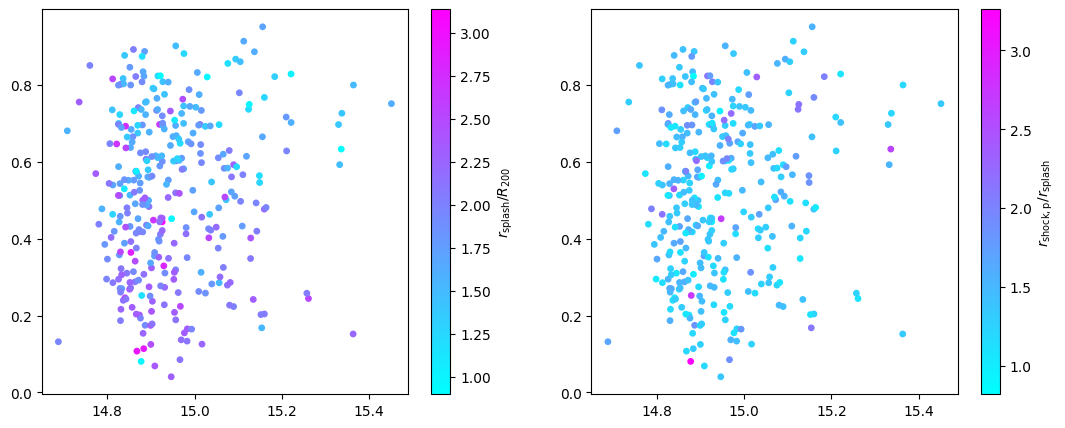

In [26]:
M200 = M200_R200[:,0]

redshifts = History[:, 0]
masses = History[:, 1:]
interp_func = interp1d(redshifts, masses, axis=0, kind='linear', fill_value="extrapolate")
mass_z0 = interp_func(0)
mass_z05 = interp_func(0.5)
accretion_rate = (mass_z0 - mass_z05) / mass_z0

fig = plt.figure(figsize=(13, 11))
plt.subplots_adjust(wspace=0.2)
ax1=fig.add_subplot(2,2,1)
norm = plt.Normalize(np.array(Rsp).min(), np.array(Rsp).max())
cmap = plt.cm.cool
sc1 = ax1.scatter(np.log10(M200), accretion_rate, c=Rsp, cmap=cmap, norm=norm, s=15)
cbar = plt.colorbar(sc1, ax=ax1)
cbar.set_label(r'$r_{\rm splash}/R_{200}$')


ax1=fig.add_subplot(2,2,2)
norm = plt.Normalize((np.array(Rsh)/np.array(Rsp)).min(), (np.array(Rsh)/np.array(Rsp)).max())
cmap = plt.cm.cool
sc1 = ax1.scatter(np.log10(M200), accretion_rate, c=np.array(Rsh)/np.array(Rsp), cmap=cmap, norm=norm, s=15)
cbar = plt.colorbar(sc1, ax=ax1)
cbar.set_label(r'$r_{\rm shock,p}/r_{\rm splash}$')


2.1146214371947494


(0.5, 5)

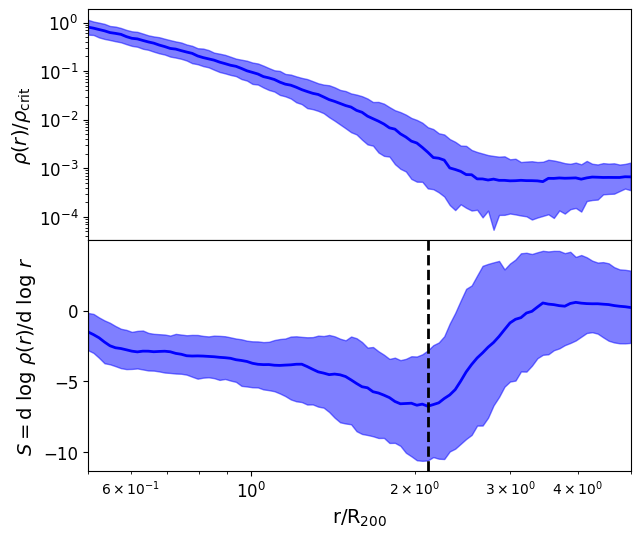

In [27]:
# stars density profile 
Rsp_star=[]
rhonorm=2.7753662724817174e-08#*0.6777**2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
start = 0.5
end = 5
log_bins = np.logspace(np.log10(start), np.log10(end), 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(hspace=0.0)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for i in range(Stars_density.shape[0]):
# for i in range(10):
    # ax1.plot(log_bins, DM_density[i]/rhonorm, color='blue',linewidth=0.5, alpha=0.2)
    smoothed_density = gaussian_filter1d(Stars_density[i], sigma=2)
    # smoothed_density = savgol_filter(DM_density[i], window_length=15, polyorder=3, deriv=0, delta=0.1)
    log_D = np.log(smoothed_density)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    # ax2.plot(log_bins, smoothed_d_log_D, color='blue', linestyle='-', linewidth=0.5, alpha=0.2) # colors[i % len(colors)]
    
    restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    
    r_splash_index = np.argmin(smoothed_d_log_D_restricted)
    r_splash = rr[r_splash_index]
    
    # interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    # log_bins_dense = np.linspace(r_splash-0.2, r_splash+0.2, 500)
    # smoothed_d_log_D_dense = interp_func(log_bins_dense)
    # max_index = np.argmin(smoothed_d_log_D_dense)
    # r_splash = log_bins_dense[max_index]

    Rsp_star.append(r_splash)
    
median_DM_density = np.median(Stars_density, axis=0)
percentile16_DM_density = np.percentile(Stars_density, 10, axis=0)
percentile84_DM_density = np.percentile(Stars_density, 90, axis=0)

ax1.plot(log_bins, median_DM_density / rhonorm, color='b', linewidth=2.0, alpha=1)
ax1.fill_between(log_bins, percentile16_DM_density / rhonorm, percentile84_DM_density / rhonorm, color='b', alpha=0.5)

d_log_D_all = []
for density in Stars_density:
    # smoothed_density = savgol_filter(density, window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_density = gaussian_filter1d(density, sigma=2)
    log_D = np.log(smoothed_density)
    d_log_D = np.gradient(log_D, log_r)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    d_log_D_all.append(smoothed_d_log_D)

d_log_D_all = np.array(d_log_D_all)
median_d_log_D = np.median(d_log_D_all, axis=0)
percentile16_d_log_D = np.percentile(d_log_D_all, 10, axis=0)
percentile84_d_log_D = np.percentile(d_log_D_all, 90, axis=0)

ax2.plot(log_bins, median_d_log_D, color='b', linestyle='-', linewidth=2.0)
ax2.fill_between(log_bins, percentile16_d_log_D, percentile84_d_log_D, color='b', alpha=0.5)

restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
rr = log_bins[restricted_indices]
smoothed_d_log_D_restricted = median_d_log_D[restricted_indices]
r_splash_index = np.argmin(smoothed_d_log_D_restricted)
r_splash1 = rr[r_splash_index]
ax2.axvline(x=r_splash1, color='black', linestyle='--', linewidth=2.0)
print(r_splash1)

ax1.set_ylabel(r'$\rho(r)/\rho_{\rm crit}$', fontsize=14) #{\rm Log}_{10} 
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.5,5)
ax1.get_xaxis().set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r'${\rm r/R}_{200}$', fontsize=14)
ax2.set_ylabel(r'$S = {\rm d~log}~\rho(r) / {\rm d~log}~r$', fontsize=14)
# ax2.set_ylabel(r'$S$')
ax2.set_xlim(0.5,5)
# ax2.set_ylim(-6.8,3)
# plt.savefig("./figures/DM_splashback_radius_GIZMO_7k.png")

1.7152346431574592


(0.5, 5)

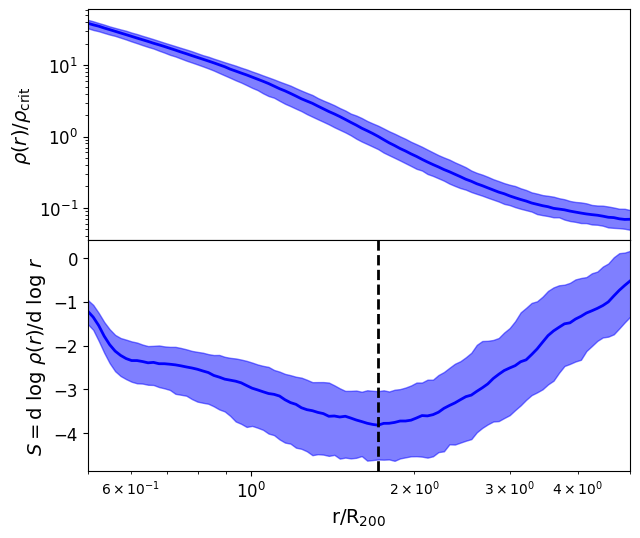

In [28]:
# gas density profile
Rsp_gas=[]
rhonorm=2.7753662724817174e-08#*0.6777**2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
start = 0.5
end = 5
log_bins = np.logspace(np.log10(start), np.log10(end), 100)

fig = plt.figure(figsize=(7, 6))
fig.subplots_adjust(hspace=0.0)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for i in range(Gas_density.shape[0]):
# for i in range(10):
    # ax1.plot(log_bins, DM_density[i]/rhonorm, color='blue',linewidth=0.5, alpha=0.2)
    smoothed_density = gaussian_filter1d(Gas_density[i], sigma=2)
    # smoothed_density = savgol_filter(DM_density[i], window_length=15, polyorder=3, deriv=0, delta=0.1)
    log_D = np.log(smoothed_density)
    log_r = np.log(log_bins)
    d_log_D = np.gradient(log_D, log_r)   
    # ax2.plot(log_bins, d_log_D, color='blue', linestyle='-', linewidth=2.0)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    # ax2.plot(log_bins, smoothed_d_log_D, color='blue', linestyle='-', linewidth=0.5, alpha=0.2) # colors[i % len(colors)]
    
    restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
    rr = log_bins[restricted_indices]
    smoothed_d_log_D_restricted = smoothed_d_log_D[restricted_indices]
    
    r_splash_index = np.argmin(smoothed_d_log_D_restricted)
    r_splash = rr[r_splash_index]
    
    # interp_func = interp1d(log_bins, smoothed_d_log_D, kind='cubic')
    # log_bins_dense = np.linspace(r_splash-0.2, r_splash+0.2, 500)
    # smoothed_d_log_D_dense = interp_func(log_bins_dense)
    # max_index = np.argmin(smoothed_d_log_D_dense)
    # r_splash = log_bins_dense[max_index]

    Rsp_gas.append(r_splash)
    
median_DM_density = np.median(Gas_density, axis=0)
percentile16_DM_density = np.percentile(Gas_density, 10, axis=0)
percentile84_DM_density = np.percentile(Gas_density, 90, axis=0)

ax1.plot(log_bins, median_DM_density / rhonorm, color='b', linewidth=2.0, alpha=1)
ax1.fill_between(log_bins, percentile16_DM_density / rhonorm, percentile84_DM_density / rhonorm, color='b', alpha=0.5)

d_log_D_all = []
for density in Gas_density:
    # smoothed_density = savgol_filter(density, window_length=15, polyorder=4, deriv=0, delta=0.1)
    smoothed_density = gaussian_filter1d(density, sigma=2)
    log_D = np.log(smoothed_density)
    d_log_D = np.gradient(log_D, log_r)
    # smoothed_d_log_D = savgol_filter(d_log_D, window_length=15, polyorder=4, deriv=0, delta=0.01)
    smoothed_d_log_D = gaussian_filter1d(d_log_D, sigma=2)
    d_log_D_all.append(smoothed_d_log_D)

d_log_D_all = np.array(d_log_D_all)
median_d_log_D = np.median(d_log_D_all, axis=0)
percentile16_d_log_D = np.percentile(d_log_D_all, 10, axis=0)
percentile84_d_log_D = np.percentile(d_log_D_all, 90, axis=0)

ax2.plot(log_bins, median_d_log_D, color='b', linestyle='-', linewidth=2.0)
ax2.fill_between(log_bins, percentile16_d_log_D, percentile84_d_log_D, color='b', alpha=0.5)

restricted_indices = np.where((log_bins >= 0.55) & (log_bins <= 4.5))[0]
rr = log_bins[restricted_indices]
smoothed_d_log_D_restricted = median_d_log_D[restricted_indices]
r_splash_index = np.argmin(smoothed_d_log_D_restricted)
r_splash1 = rr[r_splash_index]
ax2.axvline(x=r_splash1, color='black', linestyle='--', linewidth=2.0)
print(r_splash1)

ax1.set_ylabel(r'$\rho(r)/\rho_{\rm crit}$', fontsize=14) #{\rm Log}_{10} 
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.5,5)
ax1.get_xaxis().set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlabel(r'${\rm r/R}_{200}$', fontsize=14)
ax2.set_ylabel(r'$S = {\rm d~log}~\rho(r) / {\rm d~log}~r$', fontsize=14)
# ax2.set_ylabel(r'$S$')
ax2.set_xlim(0.5,5)
# ax2.set_ylim(-6.8,3)
# plt.savefig("./figures/DM_splashback_radius_GIZMO_7k.png")